# Calculating the similarity matrix and using it to fit an SVM

In [1]:
import numpy as np
import pandas as pd
import utils
import turicreate as tc
import matplotlib.pyplot as plt

In [2]:
data = tc.SFrame({
    'x1': [0,-1,0,0,1,-1,1],
    'x2': [0,0,-1,1,0,1,-1],
    'y': [0,0,0,1,1,1,1]
})
data

x1,x2,y
0,0,0
-1,0,0
0,-1,0
0,1,1
1,0,1
-1,1,1
1,-1,1


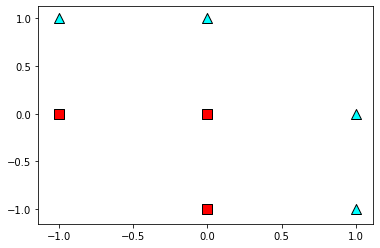

In [3]:
utils.plot_points(pd.DataFrame(data['x1','x2']), pd.DataFrame(data['y']))

### Calculating the similarity matrix

In [4]:
def similarity(x, y):
    return np.exp(-(x[0]-y[0])**2-(x[1]-y[1])**2)

In [5]:
data_with_similarities = tc.SFrame(data)

for i in range(len(data)):
    column = []
    for j in range(len(data)):
        first = [data[i]['x1'], data[i]['x2']]
        second = [data[j]['x1'], data[j]['x2']]
        column.append(similarity(first, second))
    data_with_similarities = data_with_similarities.add_column(column, 'Sim'+str(i))
data_with_similarities

Columns:
	x1	int
	x2	int
	y	int
	Sim0	float
	Sim1	float
	Sim2	float
	Sim3	float
	Sim4	float
	Sim5	float
	Sim6	float

Rows: 7

Data:
+----+----+---+---------------------+----------------------+
| x1 | x2 | y |         Sim0        |         Sim1         |
+----+----+---+---------------------+----------------------+
| 0  | 0  | 0 |         1.0         | 0.36787944117144233  |
| -1 | 0  | 0 | 0.36787944117144233 |         1.0          |
| 0  | -1 | 0 | 0.36787944117144233 |  0.1353352832366127  |
| 0  | 1  | 1 | 0.36787944117144233 |  0.1353352832366127  |
| 1  | 0  | 1 | 0.36787944117144233 | 0.01831563888873418  |
| -1 | 1  | 1 |  0.1353352832366127 | 0.36787944117144233  |
| 1  | -1 | 1 |  0.1353352832366127 | 0.006737946999085467 |
+----+----+---+---------------------+----------------------+
+----------------------+----------------------+----------------------+
|         Sim2         |         Sim3         |         Sim4         |
+----------------------+----------------------+----------------------+
| 0.36787944117144233  | 0.36787944117144233  | 0.36787944117144233  |
|  0.1353352832366127  |  0.1353352832366127  | 0.01831563888873418  |
|         1.0          | 0.01831563888873418  |  0.1353352832366127  |
| 0.01831563888873418  |         1.0          |  0.1353352832366127  |
|  0.1353352832366127  |  0.1353352832366127  |         1.0          |
| 0.006737946999085467 | 0.36787944117144233  | 0.006737946999085467 |
| 0.36787944117144233  | 0.006737946999085467 | 0.36787944117144233  |
+----------------------+----------------------+----------------------+
+------------------------+------------------------+
|          Sim5          |          Sim6          |
+------------------------+------------------------+
|   0.1353352832366127   |   0.1353352832366127   |
|  0.36787944117144233   |  0.006737946999085467  |
|  0.006737946999085467  |  0.36787944117144233   |
|  0.36787944117144233   |  0.006737946999085467  |
|  0.006737946999085467  |  0.36787944117144233   |
|          1.0           | 0.00033546262790251185 |
| 0.00033546262790251185 |          1.0           |
+------------------------+------------------------+
[7 rows x 10 columns]

### Fitting a (linear) SVM to the similarity matrix

In [6]:
svm = tc.svm_classifier.create(data_with_similarities, target='y')

SVM:

--------------------------------------------------------

Number of examples          : 7

Number of classes           : 2

Number of feature columns   : 9

Number of unpacked features : 9

Number of coefficients    : 10

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy |

+-----------+----------+-----------+--------------+-------------------+

| 0         | 3        | 5.000000  | 1.009461     | 1.000000          |

| 1         | 7        | 1.250000  | 1.012217     | 1.000000          |

| 2         | 9        | 1.036763  | 1.015046     | 1.000000          |

| 3         | 10       | 1.036763  | 1.022584     | 0.285714          |

| 4         | 13       | 0.090141  | 1.037391     | 1.000000          |

| 9         | 22       | 0.690665  | 1.060519     | 1.000000          |

+-----------+----------+-----------+--------------+-------------------+

In [7]:
svm.coefficients

name,index,class,value
(intercept),None,1,0.35621896975099737
x1,None,1,0.41253063760515934
x2,None,1,0.41253063760515957
Sim0,None,1,-1.3632790186264576
Sim1,None,1,-0.8491440337159405
Sim2,None,1,-0.8491440337159405
Sim3,None,1,0.4748876391056869
Sim4,None,1,0.47488763910568627
Sim5,None,1,1.022208179982977
Sim6,None,1,1.022208179982976


In [8]:
coefs = svm.coefficients['value']
coefs

dtype: float
Rows: 10
[0.35621896975099737, 0.41253063760515934, 0.41253063760515957, -1.3632790186264576, -0.8491440337159405, -0.8491440337159405, 0.4748876391056869, 0.47488763910568627, 1.022208179982977, 1.022208179982976]

### Plotting the classifier

In [9]:
def svm_rbf(p):
    similarities = [similarity(p, [row['x1'], row['x2']]) for row in data]
    return np.dot(similarities, [-1,-1,-1,1,1,1,1])

In [10]:
features = np.array(pd.DataFrame(data['x1','x2']))
labels = np.array(data['y'])

In [11]:
def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = np.array([model(i) for i in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,colors = 'k',linewidths = 3)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=[-20,0,20])
    utils.plot_points(X, y)
    plt.show()

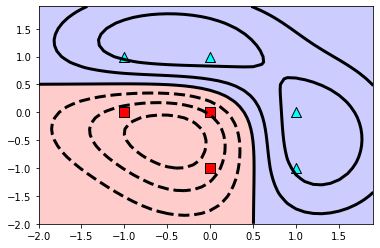

In [12]:
plot_model(features, labels, svm_rbf)